<a href="https://colab.research.google.com/github/Musungu-Maureen/WEEK_4_IP_CORE/blob/main/Maureen_Musungu_Week_4_IP_Core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autolib Hypothesis Analysis

## Reading the Data

In [1]:
## Importing our libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ttest_ind

In [4]:
## Loading our csv file

df = pd.read_csv('/content/autolib_daily_events_postal_code.csv')

## Previewing the top of our dataset
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


### Creating a sample 

In [5]:
# Stratified sample
df_sample = df.groupby('dayOfWeek', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))

# proportion of the non_stratified sample
print(df_sample['dayOfWeek'].value_counts())

# Check the stratified output
print(df_sample)

0    237
1    236
6    227
5    227
4    227
3    227
2    227
Name: dayOfWeek, dtype: int64
       Postal code       date  ...  Slots_freed_sum  Slots_taken_sum
4825         92110  6/11/2018  ...                0                0
9920         92800  4/23/2018  ...                9               10
12608        93600  4/23/2018  ...                0                0
4980         92120  6/11/2018  ...                0                0
9788         92700  5/28/2018  ...                0                0
...            ...        ...  ...              ...              ...
1231         75008   6/3/2018  ...              146              147
15399        94700   4/8/2018  ...                0                0
2821         75019  1/14/2018  ...              168              177
14197        94160   6/3/2018  ...                7                7
2686         75018   2/4/2018  ...              131              136

[1608 rows x 13 columns]


In [6]:
df_sample.shape

(1608, 13)

### Creating a new dataframe with our desired columns 

In [12]:
## creating a dataframe with only the two days of the week that we are interested in
df = df_sample["dayOfWeek"].isin(["0","4"])
df = df_sample[df]
df_new=df[['Postal code','date','day_type','dayOfWeek','Slots_taken_sum']]
df_new

,Postal code,date,day_type,dayOfWeek,Slots_taken_sum
4825,92110,6/11/2018,weekday,0,0
9920,92800,4/23/2018,weekday,0,10
12608,93600,4/23/2018,weekday,0,0
4980,92120,6/11/2018,weekday,0,0
9788,92700,5/28/2018,weekday,0,0
...,...,...,...,...,...
8725,92390,1/5/2018,weekday,4,0
7109,92270,4/6/2018,weekday,4,0
3420,75116,6/8/2018,weekday,4,2
5757,92170,6/8/2018,weekday,4,0


## Tidying our Dataset

1. Consistency

In [13]:
## Checking for duplicates
df_new.duplicated().sum()

0

There are no duplicated records in our data. 

2. Completeness

In [14]:
df_new.isnull().sum()

Postal code        0
date               0
day_type           0
dayOfWeek          0
Slots_taken_sum    0
dtype: int64

There are no null values in our data. 

In [15]:
# Checking for outliers
## function to check for outliers using boxplots in the 3 numerical columns
def check_outlier(column_name):
  boxplot = sns.boxplot(df_new[column_name])
  plt.title('Box Plot to Show Outliers')
  return boxplot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


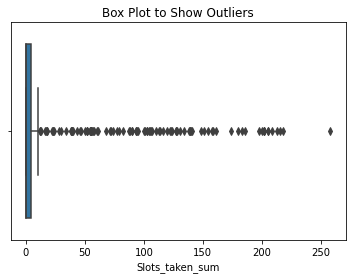

In [16]:
check_outlier('Slots_taken_sum')

In [17]:
#Function to remove outliers using z-score
def remove_outliers(data, col):
    col_upper = data[col].mean() + 3*data[col].std()
    col_lower = data[col].mean() - 3*data[col].std()
    df = data[(data[col]< col_upper) & (data[col]> col_lower)]
    return df

In [18]:
final_df = remove_outliers(df_new, 'Slots_taken_sum')
final_df.shape


(448, 5)

In [19]:
## Changing the data types 
final_df['date']=pd.to_datetime(final_df['date'])
final_df['day_type']=pd.Categorical(final_df['day_type'])
final_df['dayOfWeek']=pd.Categorical(final_df['dayOfWeek'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [20]:
final_df.dtypes

Postal code                 int64
date               datetime64[ns]
day_type                 category
dayOfWeek                category
Slots_taken_sum             int64
dtype: object

## UNIVARIATE ANALYSIS

## Central Tendency 

### Median

In [22]:
final_df['Slots_taken_sum'].min()

0

### Mode

In [23]:
final_df['Slots_taken_sum'].mode()

0    0
dtype: int64

## Dispersion

### Variance

In [25]:
final_df['Slots_taken_sum'].var()

1311.7583093640114

### Standard Deviation

In [26]:
final_df['Slots_taken_sum'].std()

36.21820411566553

### Skewness

In [27]:
final_df['Slots_taken_sum'].skew()

2.469194349172626

### Kurtosis

In [28]:
final_df['Slots_taken_sum'].kurt()

5.026985645999799

### Data Distribution

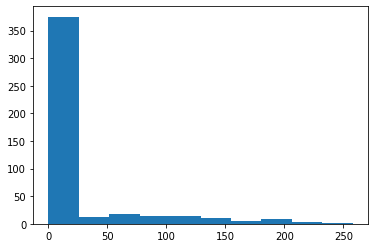

In [29]:
from matplotlib import pyplot

column = df['Slots_taken_sum']
pyplot.hist(column)
pyplot.show()

### Univariate Plots

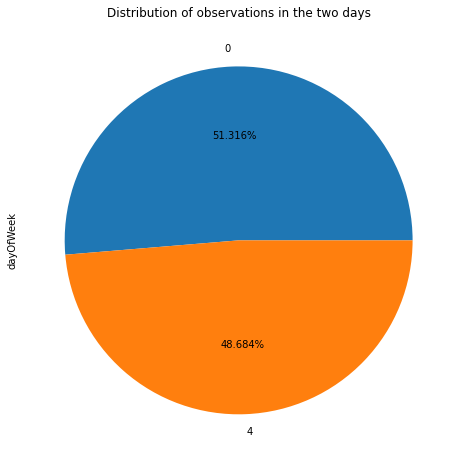

In [ ]:
final_df['dayOfWeek'].value_counts().plot(kind='pie',figsize=(8,8),autopct='%1.3f%%')
plt.title('Distribution of observations in the two days')
plt.show()

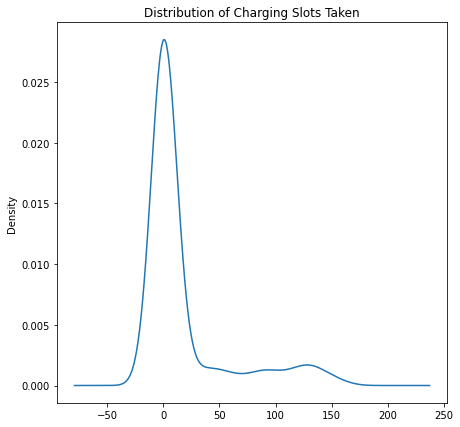

In [ ]:
final_df.Slots_taken_sum.plot(kind='kde',figsize=(7,7))
plt.title('Distribution of Charging Slots Taken')
plt.show()

In [ ]:
final_df

,Postal code,date,day_type,dayOfWeek,Slots_taken_sum
10956,93230,4/2/2018,weekday,0,0
1215,75008,5/7/2018,weekday,0,139
2137,75014,4/23/2018,weekday,0,79
12587,93600,4/2/2018,weekday,0,0
13543,94120,4/23/2018,weekday,0,0
...,...,...,...,...,...
10804,93200,4/6/2018,weekday,4,0
12100,93400,3/9/2018,weekday,4,0
5826,92190,3/2/2018,weekday,4,0
1617,75011,3/2/2018,weekday,4,125


## BIVARIATE ANALYSIS

In [ ]:
final_df[['dayOfWeek','Slots_taken_sum']].corr()


,dayOfWeek,Slots_taken_sum
dayOfWeek,1.000000,0.035878
Slots_taken_sum,0.035878,1.000000


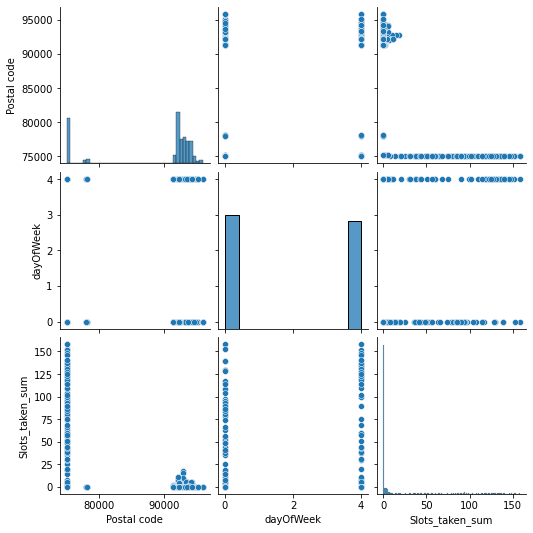

In [ ]:
sns.pairplot(final_df)
plt.show()

## Hypothesis Testing

***Is there a statistical difference between the charging slots taken on Monday and Friday?***

H0: The mean number of charging slots on Monday and Friday are the same.

H1: The mean number of charging slots on Monday and Friday are different.

The alpha α = 0.05



* Decision Rule : Reject Null if P-value< 0.05






In [35]:
from scipy.stats import ttest_ind
monday=final_df[final_df['dayOfWeek']=='0']
friday=final_df[final_df['dayOfWeek']=='4']

stats.ttest_ind(monday['Slots_taken_sum'],friday['Slots_taken_sum'], nan_policy='omit')

Ttest_indResult(statistic=-0.9316007531505365, pvalue=0.37348767854679377)

* The p-value is greater than 0.05, we therefore fail to reject the null
hypothesis. 
* This means that there is a similarity between the number of taken charging slots on Monday and Tuesday. 
